<a href="https://colab.research.google.com/github/tomaskurtenperez/MLrepo/blob/main/ClimaFuturo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/tomaskurtenperez/MLrepo/main/3326606.csv")
df.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-01,NaN,NaN,86.0,67.0
1,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-02,NaN,NaN,88.0,69.0
2,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-03,NaN,NaN,86.0,67.0
3,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-04,NaN,NaN,77.0,65.0
4,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-05,NaN,NaN,68.0,62.0


In [8]:
core_weather = df[["DATE","TMAX", "TMIN"]].copy()

In [9]:
core_weather

,DATE,TMAX,TMIN
0,2002-01-01,86.0,67.0
1,2002-01-02,88.0,69.0
2,2002-01-03,86.0,67.0
3,2002-01-04,77.0,65.0
4,2002-01-05,68.0,62.0
...,...,...,...
5126,2023-04-27,NaN,59.0
5127,2023-04-28,83.0,63.0
5128,2023-04-29,81.0,64.0
5129,2023-04-30,NaN,NaN


In [10]:
core_weather = core_weather.fillna(method="ffill")
core_weather

,DATE,TMAX,TMIN
0,2002-01-01,86.0,67.0
1,2002-01-02,88.0,69.0
2,2002-01-03,86.0,67.0
3,2002-01-04,77.0,65.0
4,2002-01-05,68.0,62.0
...,...,...,...
5126,2023-04-27,72.0,59.0
5127,2023-04-28,83.0,63.0
5128,2023-04-29,81.0,64.0
5129,2023-04-30,81.0,64.0


In [ ]:
# core_weather.index
# core_weather.index = pd.to_datetime(core_weather.index)
# core_weather.index.year

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=5131)

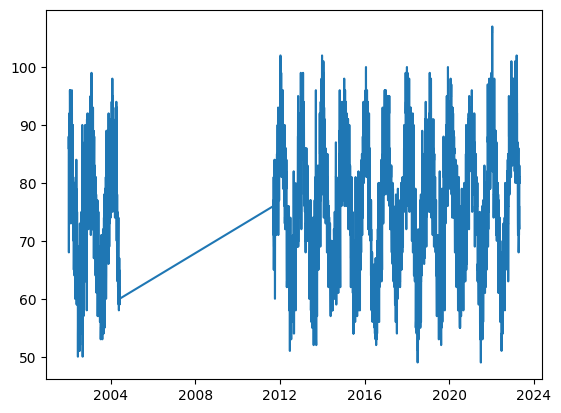

In [11]:
core_weather['DATE'] = pd.to_datetime(core_weather['DATE'])
core_weather.head()
plt.plot(core_weather['DATE'], core_weather['TMAX'])
plt.show()

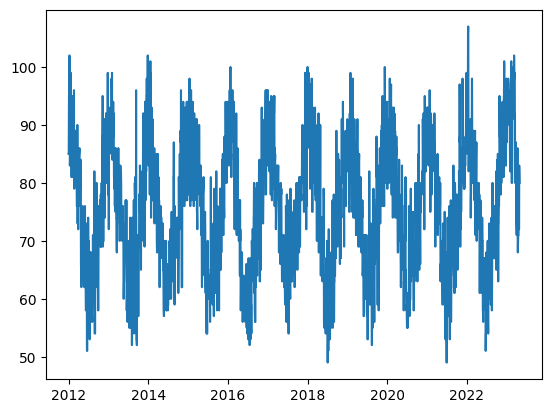

In [12]:
core_weather['Year'] = core_weather['DATE'].apply(lambda x: x.year)
core_weather = core_weather[core_weather['Year']>=2012]
plt.plot(core_weather['DATE'], core_weather['TMAX'])
plt.show()

In [13]:
data = core_weather[['DATE', 'TMAX']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-13-bb06f2421917>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
996,2012-01-01,85.0
997,2012-01-02,85.0
998,2012-01-03,95.0
999,2012-01-04,95.0
1000,2012-01-05,95.0


In [ ]:
m = NeuralProphet()

In [ ]:
model = m.fit(data, freq='D', epochs=3)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.903% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.903% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

In [18]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [20]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()
future.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.903% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.903% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y
0,2023-05-02,None
1,2023-05-03,None
2,2023-05-04,None
3,2023-05-05,None
4,2023-05-06,None
